In [23]:
import pandas as pd

In [24]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [25]:
users=pd.read_csv("users-100-restored.csv")

In [26]:
links=pd.read_csv('links-100-restored.csv')

In [27]:
users['created2'] = pd.to_datetime(users['created_on'],unit='s')

In [28]:
users['tenure'] = users['created2'].dt.year

In [29]:
len(users[users['project_counts']>1]),len(users)

(31572, 37777)

In [30]:
links.head()

,user_id,design_id,type
0,13780629,40706181,create
1,13780629,40706139,create
2,13780629,40637719,create
3,13780629,40636271,create
4,368615,40305107,appreciate


In [31]:
users.head()

,user_id,fields,followers,following,username,gender,country,comments,project_counts,project_views,project_appreciations,project_comments,created_on,created2,tenure
0,655363,Graphic Design|Typography|Illustration,829,735,marleenannema,female,Netherlands,41,26,22886,2203,93,1316771916,2011-09-23 09:58:36,2011
1,37617671,Interior Design|Architecture|Furniture Design,824,19,design-17,female,Ukraine,66,9,58265,15111,79,1466358073,2016-06-19 17:41:13,2016
2,1048585,Illustration|Digital Art|Photography,251,5399,Reks_kok,male,New Zealand,5,17,3674,282,20,1333334842,2012-04-02 02:47:22,2012
3,7733261,Graphic Design|Illustration|Drawing,21,23,awacolours,female,Venezuela,2,18,729,79,4,1409436883,2014-08-30 22:14:43,2014
4,1441807,Photography|Retouching|Digital Art,89,1118,AshPhotoArt,male,India,5,9,1486,83,17,1344345169,2012-08-07 13:12:49,2012


In [32]:
appreciated=links[links['type']=='appreciate']

In [33]:
num_apr=appreciated.groupby('user_id')[['design_id']].count().rename(columns={'design_id':'appreciate'})

In [34]:
users=users.set_index('user_id').join(num_apr)

In [35]:
len(users)

37777

# FILTER USERS WITH AT LEAST 10 ACTIVITY

In [36]:
users['total_activity']=users['project_counts']+users['appreciate']

In [37]:
min10=users[users['total_activity']>10]

In [38]:
min10['gender'].value_counts()

male      21617
female     8569
Name: gender, dtype: int64

In [74]:
import numpy as np

In [85]:
min10_max500following=min10.sort_values(by='following', ascending=False)[299:]

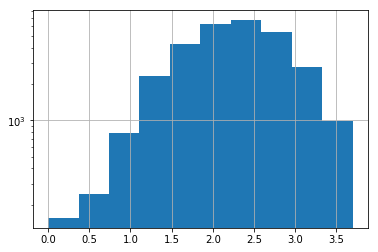

In [86]:
np.log10(min10_max500following['following']+1).hist(log=True)

# Sampling

In [93]:
fields=pd.read_csv('fields_with_PCAs_top1000.csv').set_index('Unnamed: 0')

In [94]:
fields.head()

,graphic_design,illustration,branding,art_direction,digital_art,photography,advertising,drawing,typography,print_design,...,automotive_design,Photography,Graphic_Design,Branding,Art_Direction,Digital_Art,Fashion_Photography,Fine_Arts,Web_design_UX,Advertising
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
50001,23.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,-2.843443,10.574208,17.666705,-11.341136,-1.534516,1.025927,5.856523,3.278943,-2.338689
50004,5.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,2.0,...,0.0,-1.960955,-4.553452,3.648332,-2.369650,-1.609945,1.679688,2.083386,4.467978,-0.325217
50000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-4.404304,-8.031808,-0.788132,-1.153125,-0.731708,1.535553,1.043185,3.629778,0.167361
50020,7.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,...,0.0,17.071628,-10.179533,5.269223,-4.013192,-1.404825,3.354565,1.339837,-1.982801,0.125105
50030,14.0,36.0,5.0,110.0,81.0,5.0,52.0,1.0,2.0,1.0,...,2.0,23.588008,66.403038,23.407436,102.936013,56.514127,17.569063,-16.591992,11.466204,21.819668


In [97]:
min10_max500following_fields=min10_max500following.join(fields)

In [98]:
males=min10_max500following_fields[users['gender']=='male']
females=min10_max500following_fields[users['gender']=='female']

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [99]:
min10_max500following_fields['gender'].value_counts()

male      21350
female     8537
Name: gender, dtype: int64

In [100]:
for i in range(0,5):
    male_sample=males.sample(n=6000, random_state=1)
    female_sample=females.sample(n=6000, random_state=1)
    sample=male_sample.append(female_sample)
    sample.to_csv('behance_filtered_sample_min10_act_max5000_following_sample'+str(i)+".csv")
    